In [1]:
import numpy as np
from utils import *

In [2]:
topologies = [
    [4, 8, 16, 32, 16, 8, 4],
    [10 for _ in range(3)],
    [10 for _ in range(5)],
    [10 for _ in range(10)],
    [23 for _ in range(12)],
    [3 for _ in range(20)],
]

In [3]:
from models.mlp import MultilayerPerceptron

models = []
for topology in topologies:
    model = MultilayerPerceptron(3, topology, 1, learning_rate=0.1)
    models.append(model)

In [4]:
data = np.loadtxt("data/Spiral3d.csv", delimiter=",")
X = data[:, :-1].T
y = data[:, -1:].T

p, N = X.shape

In [5]:
X_normalized = standardize(X.T).T

X_train = X_normalized[:, :int(0.75 * N)]
y_train = y[:, :int(0.75 * N)]
X_test = X_normalized[:, int(0.75 * N):]
y_test = y[:, int(0.75 * N):]

In [ ]:
for i, model in enumerate(models):
    print(f"Training model {i + 1} with topology {topologies[i]}")
    # Train the model
    model.train(X_train, y_train, epochs=20_000, tol=0.01, patience=2000, patience_start=1000)

Training model 1 with topology [4, 8, 16, 32, 16, 8, 4]
Epoch: 0, MSE: 0.27806440269377225, Learning Rate: 0.1
Epoch: 1, MSE: 0.2729976490354146, Learning Rate: 0.099995
Epoch: 2, MSE: 0.2730095781118696, Learning Rate: 0.09999000000000001
Epoch: 3, MSE: 0.27301458450720706, Learning Rate: 0.099985
Epoch: 4, MSE: 0.2730176433274917, Learning Rate: 0.09998000000000001
Epoch: 5, MSE: 0.27301951721160117, Learning Rate: 0.09997500000000001
Epoch: 6, MSE: 0.27302058147119823, Learning Rate: 0.09997
Epoch: 7, MSE: 0.2730210652679945, Learning Rate: 0.09996500000000001
Epoch: 8, MSE: 0.27302111777931487, Learning Rate: 0.09996000000000001
Epoch: 9, MSE: 0.2730208405289193, Learning Rate: 0.09995500000000002
Epoch: 10, MSE: 0.27302030512801406, Learning Rate: 0.09995000000000001
Epoch: 11, MSE: 0.2730195636094399, Learning Rate: 0.099945
Epoch: 12, MSE: 0.2730186547371349, Learning Rate: 0.09994
Epoch: 13, MSE: 0.2730176080127786, Learning Rate: 0.099935
Epoch: 14, MSE: 0.2730164463066624, Le

In [ ]:
ys = []
for i, model in enumerate(models):
    print(f"Predicting with model {i + 1} with topology {model.topology}")
    # Predict
    _y = model.predict(X_test)
    ys.append(_y)

Accuracy: 80.60%


In [ ]:
for i, model in enumerate(models):
    print(f"Model {i + 1} with topology {model.topology}")
    print(f"Results:")
    true_labels = y_test.flatten()
    true_positives = np.sum((np.round(ys[i]) == 1) & (true_labels == 1))
    false_positives = np.sum((np.round(ys[i]) == 1) & (true_labels == -1))
    true_negatives = np.sum((np.round(ys[i]) == -1) & (true_labels == -1))
    false_negatives = np.sum((np.round(ys[i]) == -1) & (true_labels == 1))
    accuracy = (true_positives + true_negatives) / (true_positives + false_positives + true_negatives + false_negatives)
    print(f"Accuracy: {accuracy:.2%}")
    print(f"True Positives: {true_positives}")
    print(f"False Positives: {false_positives}")
    print(f"True Negatives: {true_negatives}")
    print(f"False Negatives: {false_negatives}")
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    print(f"Precision: {precision:.2%}")
    print(f"Recall: {recall:.2%}")

Accuracy: 80.60%
True Positives: 234
False Positives: 73
True Negatives: 169
False Negatives: 24
Precision: 76.22%
Recall: 90.70%


In [ ]:
from evaluator import Evaluator

evaluator = Evaluator(model)
evaluator.evaluate(X_test, y_test)

/home/rafael-albuquerque/repos/ia-av2/evaluator.py:23: RuntimeWarning: invalid value encountered in scalar divide
  precision = np.sum(true_positives) / (np.sum(true_positives) + np.sum(false_positives))


(np.float64(0.0), np.float64(nan), np.float64(0.0))

Text(0.5, 0.92, 'Rótulos')

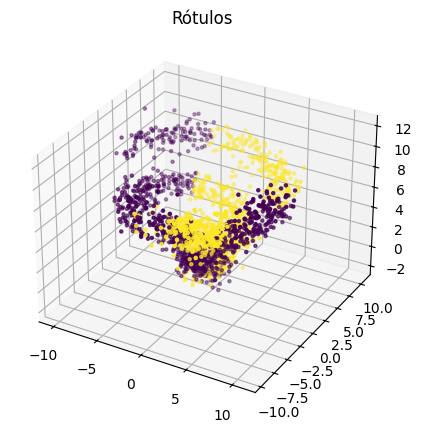

In [ ]:
import matplotlib.pyplot as plt

X_plot = X.T
y_plot = model.predict(X)
y_plot = y_plot.flatten()

fig = plt.figure(1, figsize=(20, 5))
ax = fig.add_subplot(1, 1, 1, projection="3d")
ax.scatter(X_plot[:, 0], X_plot[:, 1], X_plot[:, 2], c=y_plot, s=5, cmap="viridis")
ax.set_title("Rótulos")